<a href="https://colab.research.google.com/github/priyankakusupudi/DataVizFall2020/blob/master/Copy_of_Copy_of_Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

I am Vijaya Lakshmi Priyanka Kusupudi

## Loading US County Level Data

In [20]:
%reset -f 
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

In [22]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe

df = pd.read_csv(db)


# Explore data

In [3]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
df.nunique()


date        237
county     1923
state        55
fips       3205
cases     16345
deaths     2407
dtype: int64

In [12]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
df = pd.read_csv(db, index_col= "county")
r = df.query(('county == "Bristol" or county == "Suffolk"') and 'state == "Massachusetts" ' , inplace = False)
x = r.loc[["Bristol","Suffolk"],["fips"]]
y = x.drop_duplicates(subset=['fips'])
print(y)

            fips
county          
Bristol  25005.0
Suffolk  25025.0


In [6]:
df = pd.read_csv(db, index_col= "date")
r = df.query('county == "Bristol" and state == "Massachusetts" ' , inplace = False)
re = r.loc[:, ["county","state","cases","deaths"]]
get_county_stat = re.iloc[0:5,[ True, True,True,True]]
print(get_county_stat)

             county          state  cases  deaths
date                                             
2020-03-14  Bristol  Massachusetts      1       0
2020-03-15  Bristol  Massachusetts      1       0
2020-03-16  Bristol  Massachusetts      2       0
2020-03-17  Bristol  Massachusetts      5       0
2020-03-18  Bristol  Massachusetts      5       0


## Explore data type

In [7]:
df_c = df[df['county'].isin(['Bristol','Suffolk'])].copy()
df_c.head(30)
df.info()






<class 'pandas.core.frame.DataFrame'>
Index: 531243 entries, 2020-01-21 to 2020-09-13
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  531243 non-null  object 
 1   state   531243 non-null  object 
 2   fips    526130 non-null  float64
 3   cases   531243 non-null  int64  
 4   deaths  531243 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 44.3+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


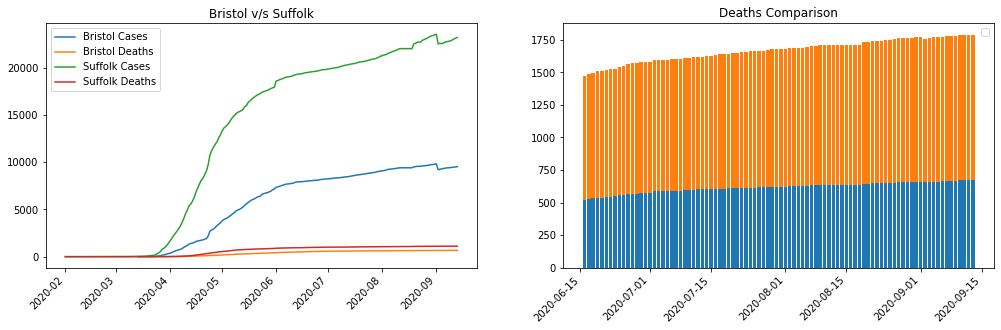

In [34]:
df_bristol = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]
df_suffolk = df[(df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts')]
df_bristol['date'] = pd.to_datetime(df_bristol['date'])
df_suffolk['date'] = pd.to_datetime(df_suffolk['date'])
f,ax = plt.subplots(1,2,figsize=(17,5))
ax[0].plot(df_bristol['date'],df_bristol['cases'],label = 'Bristol Cases')
ax[0].plot(df_bristol['date'],df_bristol['deaths'],label = 'Bristol Deaths')
ax[0].plot(df_suffolk['date'],df_suffolk['cases'],label = 'Suffolk Cases')
ax[0].plot(df_suffolk['date'],df_suffolk['deaths'],label = 'Suffolk Deaths')
ax[0].legend()
ax[0].set_title('Bristol v/s Suffolk')
f.autofmt_xdate(rotation=45)



ax[1].bar(df_bristol.date.iloc[-90:],df_bristol.deaths.iloc[-90:])
ax[1].bar(df_suffolk.date.iloc[-90:],df_suffolk.deaths.iloc[-90:],
       bottom = df_bristol.deaths.iloc[-90:]  )
ax[1].legend()
ax[1].set_title('Deaths Comparison')
f.autofmt_xdate(rotation=45)



In [11]:

r=df.groupby("county")["deaths","cases"].max().sort_values(by=('cases'),ascending = False)
r.head(10)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,deaths,cases
county,,
Los Angeles,6208,253985
New York City,23744,242486
Miami-Dade,2882,164085
Maricopa,3158,137507
Cook,5133,134801
Harris,2420,116172
Dallas,1045,78511
Broward,1280,74434
Clark,1260,62650


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

In [10]:

df['CovidCases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['CovidCases'] = df['CovidCases'].rolling(window =3).max()
df['CovidDeaths'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['CovidDeaths'] = df['CovidDeaths'].rolling(window =3).max()
x = df.groupby(['fips','county'], as_index = False).sum()
x['DeathRatePerFips'] = x['CovidDeaths']/x['CovidCases']*100
x[['fips','DeathRatePerFips']]

,fips,DeathRatePerFips
0,1001.0,1.968020
1,1003.0,1.338176
2,1005.0,1.395793
3,1007.0,1.110450
4,1009.0,1.405975
...,...,...
3200,72151.0,0.000000
3201,72153.0,0.000000
3202,78010.0,1.740812
3203,78020.0,1.698514


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [ ]:
df_FR = df['county']
df_FR = df_FR[df_FR.columns[:4]].join(df_FR[df_FR.columns[-2:]])
df_FR['vals'] = df_FR[df_FR.columns[-1]] - df_FR[df_FR.columns[-2]]
data = df_FR[['Lat','Long', 'vals']].values.tolist()
df_FR